In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pymongo
import pandas as pd
import re

In [4]:
user = 'team04'
pw = '1111'
host = 'ec2-54-95-8-243.ap-northeast-1.compute.amazonaws.com'
client = pymongo.MongoClient(f'mongodb://{user}:{pw}@{host}:27017/')
db = client.resell

In [5]:
df = pd.DataFrame(db.kream_detail.find())
df

,_id,brand,prod_kr_name,rescent_price,model_no,release_date,colors,release_price,instant_buy_price,instant_sell_price,img_url
0,Jordan 1 Low Vintage Grey,Jordan,조던 1 로우 빈티지 그레이,"200,000",553558-053,-,GREY/WHITE/CREAM,"129,000원","202,000","201,000",https://kream-phinf.pstatic.net/MjAyMjA2MjdfMT...
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,Jordan,조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루,"1,555,000",DM7866-140,21/08/13,SAIL/BLACK/MILITARY BLUE,"189,000원","1,540,000","2,230,000",https://kream-phinf.pstatic.net/MjAyMTA3MzBfNT...
2,Jordan 1 Retro High OG Black Mocha,Jordan,조던 1 레트로 하이 OG 블랙 모카,"702,000",555088-105,20/11/13,SAIL/DARK MOCHA-BLACK-BLACK,"199,000원","600,000","818,000",https://kream-phinf.pstatic.net/MjAyMDEwMjJfOC...
3,Jordan 4 Retro White and Black,Jordan,조던 4 레트로 화이트 앤 블랙,"312,000",DH6927-111,22/05/23,WHITE/BLACK/NEUTRAL GREY,"249,000원","299,000","313,000",https://kream-phinf.pstatic.net/MjAyMjA1MDlfOD...
4,Jordan 1 Retro High OG Bleached Coral,Jordan,조던 1 레트로 하이 OG 블리치드 코랄,"244,000",555088-108,22/05/14,WHITE/BLACK/GREY FOG/BLEACHED CORAL,"209,000원","207,000","270,000",https://kream-phinf.pstatic.net/MjAyMjA1MDlfMT...
...,...,...,...,...,...,...,...,...,...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),Jordan,조던 1 레트로 하이 OG SP 지나 (스페셜 박스),-,CD7071-001,19/05/25,BLACK/BLACK-WHITE-VARSITY RED,"$180 (약 234,600원)",-,-,https://kream-phinf.pstatic.net/MjAyMTAyMjJfMS...
2989,Jordan 13 Retro Low Quai 54,Jordan,조던 13 레트로 로우 콰이 54,-,810551-050,15/06/14,BLACK/DARK GREY-WHITE-CHROME,"$250 (약 325,200원)",-,-,https://kream-phinf.pstatic.net/MjAyMDEwMjJfMj...
2990,(GS) Jordan 11 Retro Heiress Velvet,Jordan,(GS) 조던 11 레트로 헤어리스 벨벳,"290,000",852625-650,16/12/18,NIGHT MAROON/METALLIC GOLD-NIGHT MAROON,"$220 (약 286,200원)","340,000","180,000",https://kream-phinf.pstatic.net/MjAyMDEwMjJfND...
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,Jordan,조던 1 레트로 하이 플라이니트 데릭 지터 RE2PECT,"350,000",AH7233-105,18/02/24,SAIL/METALLIC GOLD-MIDNIGHT NAVY,"$180 (약 234,100원)","380,000","150,000",https://kream-phinf.pstatic.net/MjAyMDEwMjJfNT...


In [6]:
# 콜라보, 시리즈, 타입에 필요 없는 열 제거
new_df = df.drop(columns=['brand', 'colors', 'model_no', 'release_date', 'release_price', 'instant_buy_price', 'instant_sell_price', 'img_url', 'prod_kr_name'])
new_df.head()

,_id,rescent_price
0,Jordan 1 Low Vintage Grey,"200,000"
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000"
2,Jordan 1 Retro High OG Black Mocha,"702,000"
3,Jordan 4 Retro White and Black,"312,000"
4,Jordan 1 Retro High OG Bleached Coral,"244,000"


In [7]:
def extract_collabo(data):
    p = re.compile(r"\bx\s\w+", re.M)
    result = p.findall(data)
    
    result = [word[2:] for word in result]
    
    return ','.join(result)
new_df['_id'].apply(extract_collabo)

0                      
1       Travis,Fragment
2                      
3                      
4                      
             ...       
2988                   
2989                   
2990                   
2991                   
2992                   
Name: _id, Length: 2993, dtype: object

In [8]:
df['collabo'] = new_df['_id'].str.contains('x')
df['collabo'].head()

0    False
1     True
2    False
3    False
4    False
Name: collabo, dtype: bool

In [9]:
new_df.query('_id.str.contains("Jordan 1|Jordan 2|Jordan 3|Jordan 4|Jordan 5|Jordan 6|Jordan 7|Jordan 8|Jordan 9|Jordan 10|Jordan 11|Jordan 12|Jordan 13|Jordan 14|Jordan 15\
    |Jordan 16|Jordan 17|Jordan 18|Jordan 19|Jordan 20|Jordan 21")', engine='python')
#[word[2:] for word in result]

,_id,rescent_price
0,Jordan 1 Low Vintage Grey,"200,000"
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000"
2,Jordan 1 Retro High OG Black Mocha,"702,000"
3,Jordan 4 Retro White and Black,"312,000"
4,Jordan 1 Retro High OG Bleached Coral,"244,000"
...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),-
2989,Jordan 13 Retro Low Quai 54,-
2990,(GS) Jordan 11 Retro Heiress Velvet,"290,000"
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000"


In [10]:
df[df['_id'].str.contains('Jordan 1')].head()

,_id,brand,prod_kr_name,rescent_price,model_no,release_date,colors,release_price,instant_buy_price,instant_sell_price,img_url,collabo
0,Jordan 1 Low Vintage Grey,Jordan,조던 1 로우 빈티지 그레이,"200,000",553558-053,-,GREY/WHITE/CREAM,"129,000원","202,000","201,000",https://kream-phinf.pstatic.net/MjAyMjA2MjdfMT...,False
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,Jordan,조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루,"1,555,000",DM7866-140,21/08/13,SAIL/BLACK/MILITARY BLUE,"189,000원","1,540,000","2,230,000",https://kream-phinf.pstatic.net/MjAyMTA3MzBfNT...,True
2,Jordan 1 Retro High OG Black Mocha,Jordan,조던 1 레트로 하이 OG 블랙 모카,"702,000",555088-105,20/11/13,SAIL/DARK MOCHA-BLACK-BLACK,"199,000원","600,000","818,000",https://kream-phinf.pstatic.net/MjAyMDEwMjJfOC...,False
4,Jordan 1 Retro High OG Bleached Coral,Jordan,조던 1 레트로 하이 OG 블리치드 코랄,"244,000",555088-108,22/05/14,WHITE/BLACK/GREY FOG/BLEACHED CORAL,"209,000원","207,000","270,000",https://kream-phinf.pstatic.net/MjAyMjA1MDlfMT...,False
5,Jordan 1 Low Golf Wolf Grey,Jordan,조던 1 로우 골프 울프 그레이,"336,000",DD9315-002,22/01/14,WOLF GREY/BLACK-PHOTON DUST-WHITE,"179,000원","238,000","390,000",https://kream-phinf.pstatic.net/MjAyMjAxMDZfMT...,False


In [11]:
len(df[df['_id'].str.contains('Jordan 1')])

1722

In [12]:
df_line = new_df.query('_id.str.contains("Jordan 1|Jordan 2|Jordan 3|Jordan 4|Jordan 5|Jordan 6|Jordan 7|Jordan 8|Jordan 9|Jordan 10|Jordan 11|Jordan 12|Jordan 13|Jordan 14|Jordan 15\
    |Jordan 16|Jordan 17|Jordan 18|Jordan 19|Jordan 20|Jordan 21")', engine='python')
#[word[2:] for word in result]

In [13]:
df_line

,_id,rescent_price
0,Jordan 1 Low Vintage Grey,"200,000"
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000"
2,Jordan 1 Retro High OG Black Mocha,"702,000"
3,Jordan 4 Retro White and Black,"312,000"
4,Jordan 1 Retro High OG Bleached Coral,"244,000"
...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),-
2989,Jordan 13 Retro Low Quai 54,-
2990,(GS) Jordan 11 Retro Heiress Velvet,"290,000"
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000"


In [14]:
# 조던1만 새로운 조던1 프레임 생성
df_line['Jordan1'] = df_line['_id'].str.contains('Jordan 1')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14604\2437328141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['Jordan1'] = df_line['_id'].str.contains('Jordan 1')


In [15]:
df_line.head()

,_id,rescent_price,Jordan1
0,Jordan 1 Low Vintage Grey,"200,000",True
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000",True
2,Jordan 1 Retro High OG Black Mocha,"702,000",True
3,Jordan 4 Retro White and Black,"312,000",False
4,Jordan 1 Retro High OG Bleached Coral,"244,000",True


In [16]:
df_series = df_line[df_line.Jordan1 != 0]
df_series

,_id,rescent_price,Jordan1
0,Jordan 1 Low Vintage Grey,"200,000",True
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000",True
2,Jordan 1 Retro High OG Black Mocha,"702,000",True
4,Jordan 1 Retro High OG Bleached Coral,"244,000",True
5,Jordan 1 Low Golf Wolf Grey,"336,000",True
...,...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),-,True
2989,Jordan 13 Retro Low Quai 54,-,True
2990,(GS) Jordan 11 Retro Heiress Velvet,"290,000",True
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000",True


In [17]:
df_series.loc[df_series['Jordan1'] == 1, '_id'] = 'Jordan 1'
df_series

,_id,rescent_price,Jordan1
0,Jordan 1,"200,000",True
1,Jordan 1,"1,555,000",True
2,Jordan 1,"702,000",True
4,Jordan 1,"244,000",True
5,Jordan 1,"336,000",True
...,...,...,...
2988,Jordan 1,-,True
2989,Jordan 1,-,True
2990,Jordan 1,"290,000",True
2991,Jordan 1,"350,000",True


In [18]:
def extract_line(data):
    p = 'Jordan \d+'
    result = re.findall(p, data)
    
    # 모든걸반환-> 보통 list
    return result[0]

extract_line('Jordan 1 Retro High OG Bleached Coral')

# apply - lambda - re.findall - pat

'Jordan 1'

In [19]:
len(df)

2993

In [20]:
df_line = new_df.query('_id.str.contains("Jordan 1|Jordan 2|Jordan 3|Jordan 4|Jordan 5|Jordan 6|Jordan 7|Jordan 8|Jordan 9|Jordan 10|Jordan 11|Jordan 12|Jordan 13|Jordan 14|Jordan 15\
    |Jordan 16|Jordan 17|Jordan 18|Jordan 19|Jordan 20|Jordan 21")', engine='python')
#[word[2:] for word in result]

In [21]:
df_line

,_id,rescent_price
0,Jordan 1 Low Vintage Grey,"200,000"
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000"
2,Jordan 1 Retro High OG Black Mocha,"702,000"
3,Jordan 4 Retro White and Black,"312,000"
4,Jordan 1 Retro High OG Bleached Coral,"244,000"
...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),-
2989,Jordan 13 Retro Low Quai 54,-
2990,(GS) Jordan 11 Retro Heiress Velvet,"290,000"
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000"


In [22]:
df_line['line'] = df_line['_id'].apply(extract_line)
df_line.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14604\1140170920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['line'] = df_line['_id'].apply(extract_line)


,_id,rescent_price,line
0,Jordan 1 Low Vintage Grey,"200,000",Jordan 1
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000",Jordan 1
2,Jordan 1 Retro High OG Black Mocha,"702,000",Jordan 1
3,Jordan 4 Retro White and Black,"312,000",Jordan 4
4,Jordan 1 Retro High OG Bleached Coral,"244,000",Jordan 1


In [23]:
df_line["rescent_price"] = df_line["rescent_price"].str.replace(pat=r',', repl=r'', regex=True)
df_line["rescent_price"] = df_line["rescent_price"].str.replace(pat=r'-', repl=r'', regex=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14604\1863954032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line["rescent_price"] = df_line["rescent_price"].str.replace(pat=r',', repl=r'', regex=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14604\1863954032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line["rescent_price"] = df_line["rescent_price"].str.replace(pat=r'-', repl=r'', regex=True)


In [32]:
df_line[0:50]

,_id,rescent_price,line
0,Jordan 1 Low Vintage Grey,200000,Jordan 1
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,1555000,Jordan 1
2,Jordan 1 Retro High OG Black Mocha,702000,Jordan 1
3,Jordan 4 Retro White and Black,312000,Jordan 4
4,Jordan 1 Retro High OG Bleached Coral,244000,Jordan 1
5,Jordan 1 Low Golf Wolf Grey,336000,Jordan 1
6,Jordan 1 Mid Light Smoke Grey Anthracite,215000,Jordan 1
7,(W) Jordan 1 Elevate Low SE White and Wolf Grey,265000,Jordan 1
8,Jordan 1 Retro High OG University Blue,387000,Jordan 1
9,Jordan 1 Low OG Starfish,372000,Jordan 1


In [31]:
df_line = df_line.astype({'rescent_price': 'int'})

ValueError: invalid literal for int() with base 10: ''

In [25]:
df_line.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2992
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            2553 non-null   object
 1   rescent_price  2553 non-null   object
 2   line           2553 non-null   object
dtypes: object(3)
memory usage: 79.8+ KB


In [26]:
df_line['rescent_price'] = df_line['rescent_price'].astype(str)
df_line.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2992
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            2553 non-null   object
 1   rescent_price  2553 non-null   object
 2   line           2553 non-null   object
dtypes: object(3)
memory usage: 79.8+ KB


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14604\1553464143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['rescent_price'] = df_line['rescent_price'].astype(str)


라인 별로 시각화 - df_line 별로 묶은 후, rescent_price 평균 값도 가능

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

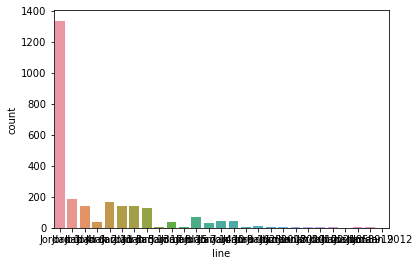

In [29]:
sns.countplot(x='line', data=df_line)
plt.show()

조던 이름 시리즈에서 -> 라인으로 변경하기 (line ex- 1, 2, 3, 4, 5...) (series ex - OG, Retro ...)

시리즈

In [107]:
df.head()

,_id,brand,prod_kr_name,rescent_price,model_no,release_date,colors,release_price,instant_buy_price,instant_sell_price,img_url,collabo
0,Jordan 1 Low Vintage Grey,Jordan,조던 1 로우 빈티지 그레이,"200,000",553558-053,-,GREY/WHITE/CREAM,"129,000원","202,000","201,000",https://kream-phinf.pstatic.net/MjAyMjA2MjdfMT...,False
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,Jordan,조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루,"1,555,000",DM7866-140,21/08/13,SAIL/BLACK/MILITARY BLUE,"189,000원","1,540,000","2,230,000",https://kream-phinf.pstatic.net/MjAyMTA3MzBfNT...,True
2,Jordan 1 Retro High OG Black Mocha,Jordan,조던 1 레트로 하이 OG 블랙 모카,"702,000",555088-105,20/11/13,SAIL/DARK MOCHA-BLACK-BLACK,"199,000원","600,000","818,000",https://kream-phinf.pstatic.net/MjAyMDEwMjJfOC...,False
3,Jordan 4 Retro White and Black,Jordan,조던 4 레트로 화이트 앤 블랙,"312,000",DH6927-111,22/05/23,WHITE/BLACK/NEUTRAL GREY,"249,000원","299,000","313,000",https://kream-phinf.pstatic.net/MjAyMjA1MDlfOD...,False
4,Jordan 1 Retro High OG Bleached Coral,Jordan,조던 1 레트로 하이 OG 블리치드 코랄,"244,000",555088-108,22/05/14,WHITE/BLACK/GREY FOG/BLEACHED CORAL,"209,000원","207,000","270,000",https://kream-phinf.pstatic.net/MjAyMjA1MDlfMT...,False


타입 - 하이/미드/로우가 들어가는 신발들만 추출하여라
그리고 해당 가격들의 평균을 보여라

In [126]:
df_series = new_df.query('_id.str.contains("High|Mid|Low")', engine='python')
df_series

,_id,rescent_price
0,Jordan 1 Low Vintage Grey,"200,000"
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000"
2,Jordan 1 Retro High OG Black Mocha,"702,000"
4,Jordan 1 Retro High OG Bleached Coral,"244,000"
5,Jordan 1 Low Golf Wolf Grey,"336,000"
...,...,...
2987,Jordan 1 Retro Low Chinese New Year 2020,-
2988,Jordan 1 Retro High OG SP Gina (Special Box),-
2989,Jordan 13 Retro Low Quai 54,-
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000"


In [178]:
def extract_Type(data):
    if 'High' in data:
        return 'High'
        
    elif 'Mid' in data:
        return 'Mid'

    elif 'Low' in data:
        return 'Low'
    
    else:
        return 'other'

extract_Type('Jordan 1 Retro Mid OG Bleached Coral')

# apply - lambda - re.findall - pat

'Mid'

In [183]:
df_type = new_df.copy()
df_type

,_id,rescent_price
0,Jordan 1 Low Vintage Grey,"200,000"
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000"
2,Jordan 1 Retro High OG Black Mocha,"702,000"
3,Jordan 4 Retro White and Black,"312,000"
4,Jordan 1 Retro High OG Bleached Coral,"244,000"
...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),-
2989,Jordan 13 Retro Low Quai 54,-
2990,(GS) Jordan 11 Retro Heiress Velvet,"290,000"
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000"


In [184]:
df_type['type'] = df_type['_id'].apply(extract_Type)
df_type

,_id,rescent_price,type
0,Jordan 1 Low Vintage Grey,"200,000",Low
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,"1,555,000",Low
2,Jordan 1 Retro High OG Black Mocha,"702,000",High
3,Jordan 4 Retro White and Black,"312,000",other
4,Jordan 1 Retro High OG Bleached Coral,"244,000",High
...,...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),-,High
2989,Jordan 13 Retro Low Quai 54,-,Low
2990,(GS) Jordan 11 Retro Heiress Velvet,"290,000",other
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,"350,000",High


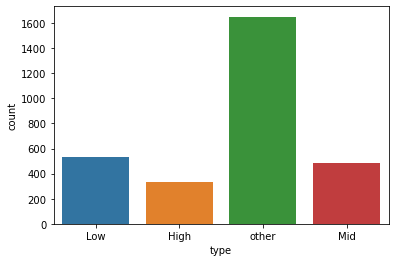

In [185]:
sns.countplot(x='type', data=df_type)
plt.show()

시리즈, 콜라보